In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from ipynb.fs.full.data_preprocessing_function import preprocessing_data

In [2]:
#updated data preprocessing

#read data
list_Xtrain=[]
list_Xtest=[]
list_ytrain=[]
list_ytest=[]

overview = pd.read_excel('../osfstorage-archive/pmdata/participant-overview.xlsx')
overview = overview.set_axis(overview.iloc[0,:],axis='columns').set_index('Participant ID',drop=True)

for x in range(1, 17):
    person_number = x
    
    person_number = str('%02d' % person_number)

    calories = []
    distance = []
    l_act = []
    m_act = []
    r_heart = []
    sedentary = []
    sleep_score = []
    sleep = []
    hr_zone = []
    v_act = []
    wellness = []
    
    display('P'+person_number)
    
    try:

        calories = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/calories.json')
        distance = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/distance.json')
        l_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/lightly_active_minutes.json')
        m_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/moderately_active_minutes.json')
        r_heart = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/resting_heart_rate.json')
        sedentary = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sedentary_minutes.json')
        sleep_score = pd.read_csv('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sleep_score.csv')
        sleep = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sleep.json')
        steps = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/steps.json')
        hr_zone = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/time_in_heart_rate_zones.json')
        v_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/very_active_minutes.json')
        wellness = pd.read_csv('../osfstorage-archive/pmdata/p'+person_number+'/pmsys/wellness.csv')  


        if x in [8,14]:
            preprocessing_result = preprocessing_data(person_number, calories, distance, l_act, m_act, r_heart, sedentary, sleep_score, sleep, steps, hr_zone, v_act, wellness)
            display('P'+person_number+' extra columns dropped')
        else:
            preprocessing_result = preprocessing_data(person_number, calories, distance, l_act, m_act, r_heart, sedentary, sleep_score, sleep, steps, hr_zone, v_act, wellness)

        #handling missing values on target
        preprocessing_result['readiness'] = preprocessing_result['readiness'].shift(periods=-1) #shift next date's readiness to current date
        preprocessing_result = preprocessing_result[preprocessing_result['readiness'].notna()] #drop missing values on readiness

        #zero values to nan
        preprocessing_result['calories'] = preprocessing_result['calories'].replace(0,np.nan)
        preprocessing_result['distance'] = preprocessing_result['distance'].replace(0,np.nan)
        preprocessing_result['l_act'] = preprocessing_result['l_act'].replace(0,np.nan)
        preprocessing_result['resting_heart'] = preprocessing_result['resting_heart'].replace(0,np.nan)
        preprocessing_result['steps'] = preprocessing_result['steps'].replace(0,np.nan)
                     
        #missing values filled with mean value of the column
#        preprocessing_result.loc[:,'calories'] = preprocessing_result.loc[:,'calories'].fillna(preprocessing_result.loc[:,'calories'].mean())
        preprocessing_result.loc[:,'distance'] = preprocessing_result.loc[:,'distance'].fillna(preprocessing_result.loc[:,'distance'].mean())
        preprocessing_result.loc[:,'l_act'] = preprocessing_result.loc[:,'l_act'].fillna(preprocessing_result.loc[:,'l_act'].mean())
#        preprocessing_result.loc[:,'m_act'] = preprocessing_result.loc[:,'m_act'].fillna(preprocessing_result.loc[:,'m_act'].mean())
#try KNN imputer        preprocessing_result.loc[:,'resting_heart'] = preprocessing_result.loc[:,'resting_heart'].fillna(preprocessing_result.loc[:,'resting_heart'].mean())
        preprocessing_result.loc[:,'sedentary'] = preprocessing_result.loc[:,'sedentary'].fillna(preprocessing_result.loc[:,'sedentary'].mean())
#        preprocessing_result.loc[:,'sleep_overall_score'] = preprocessing_result.loc[:,'sleep_overall_score'].fillna(preprocessing_result.loc[:,'sleep_overall_score'].mean())
        preprocessing_result.loc[:,'sleep_composition_score'] = preprocessing_result.loc[:,'sleep_composition_score'].fillna(preprocessing_result.loc[:,'sleep_composition_score'].mean())
        preprocessing_result.loc[:,'sleep_revitalization_score'] = preprocessing_result.loc[:,'sleep_revitalization_score'].fillna(preprocessing_result.loc[:,'sleep_revitalization_score'].mean())
        preprocessing_result.loc[:,'sleep_duration_score'] = preprocessing_result.loc[:,'sleep_duration_score'].fillna(preprocessing_result.loc[:,'sleep_duration_score'].mean())
        preprocessing_result.loc[:,'deep_sleep_in_minutes'] = preprocessing_result.loc[:,'deep_sleep_in_minutes'].fillna(preprocessing_result.loc[:,'deep_sleep_in_minutes'].mean())
        preprocessing_result.loc[:,'sleep_resting_heart_rate'] = preprocessing_result.loc[:,'sleep_resting_heart_rate'].fillna(preprocessing_result.loc[:,'sleep_resting_heart_rate'].mean())
        preprocessing_result.loc[:,'sleep_restlessness'] = preprocessing_result.loc[:,'sleep_restlessness'].fillna(preprocessing_result.loc[:,'sleep_restlessness'].mean())
        preprocessing_result.loc[:,'sleep_duration'] = preprocessing_result.loc[:,'sleep_duration'].fillna(preprocessing_result.loc[:,'sleep_duration'].mean())
        preprocessing_result.loc[:,'sleep_minutesAsleep'] = preprocessing_result.loc[:,'sleep_minutesAsleep'].fillna(preprocessing_result.loc[:,'sleep_minutesAsleep'].mean())
        preprocessing_result.loc[:,'sleep_minutesAwake'] = preprocessing_result.loc[:,'sleep_minutesAwake'].fillna(preprocessing_result.loc[:,'sleep_minutesAwake'].mean())
        preprocessing_result.loc[:,'sleep_timeInBed'] = preprocessing_result.loc[:,'sleep_timeInBed'].fillna(preprocessing_result.loc[:,'sleep_timeInBed'].mean())
        preprocessing_result.loc[:,'sleep_efficiency'] = preprocessing_result.loc[:,'sleep_efficiency'].fillna(preprocessing_result.loc[:,'sleep_efficiency'].mean())
#        preprocessing_result.loc[:,'steps'] = preprocessing_result.loc[:,'steps'].fillna(preprocessing_result.loc[:,'steps'].mean())
        preprocessing_result.loc[:,'hr_below_zone1'] = preprocessing_result.loc[:,'hr_below_zone1'].fillna(preprocessing_result.loc[:,'hr_below_zone1'].mean())
#        preprocessing_result.loc[:,'hr_zone1'] = preprocessing_result.loc[:,'hr_zone1'].fillna(preprocessing_result.loc[:,'hr_zone1'].mean())
#        preprocessing_result.loc[:,'hr_zone3'] = preprocessing_result.loc[:,'hr_zone3'].fillna(preprocessing_result.loc[:,'hr_zone3'].mean())
#        preprocessing_result.loc[:,'hr_zone2'] = preprocessing_result.loc[:,'hr_zone2'].fillna(preprocessing_result.loc[:,'hr_zone2'].mean())
#        preprocessing_result.loc[:,'v_act'] = preprocessing_result.loc[:,'v_act'].fillna(preprocessing_result.loc[:,'v_act'].mean())



        #normalization to use knn imputer
        scaler = MinMaxScaler()
        preprocessing_normalized = scaler.fit_transform(preprocessing_result)
        preprocessing_normalized = pd.DataFrame(preprocessing_normalized, columns=preprocessing_result.columns)

        
        #using knn imputation to fill in missing values
        #sleep_minutesToFallAsleep: mostly recorded as 0 
        #sleep_minutesAfterWakeup: mostly recorded as 0
        #main_sleep: categorical variable to indicate whether the sleep was main sleep

        imputer = KNNImputer()
        df = pd.DataFrame(imputer.fit_transform(preprocessing_normalized)).set_index(preprocessing_result.index)
        df.columns = preprocessing_normalized.columns
        preprocessing_normalized = df

#        preprocessing_normalized['calories'] = preprocessing_normalized['calories'].replace(0,preprocessing_normalized['calories'].mean())
#        preprocessing_normalized['distance'] = preprocessing_normalized['distance'].replace(0,preprocessing_normalized['distance'].mean())
#        preprocessing_normalized['l_act'] = preprocessing_normalized['l_act'].replace(0,preprocessing_normalized['l_act'].mean())
#        preprocessing_normalized['resting_heart'] = preprocessing_normalized['resting_heart'].replace(0,preprocessing_normalized['resting_heart'].mean())
#        preprocessing_normalized['steps'] = preprocessing_normalized['steps'].replace(0,preprocessing_normalized['steps'].mean())

        #get back not normaliaed readiness values
        preprocessing_normalized['readiness'] = preprocessing_result['readiness']


        #add age, height, gender data -> have to be normalized in aggregated data
        preprocessing_normalized['age'] = overview.loc['p'+person_number,'Age']
        preprocessing_normalized['height'] = overview.loc['p'+person_number,'Height']
        if overview.loc['p'+person_number,'Gender'] == 'male':
            preprocessing_normalized['gender'] = 0
        else:
            preprocessing_normalized['gender'] = 1


        #add weekend/weekdays dummy variable
        week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

        for i, x in enumerate(week):
            preprocessing_normalized[x] = (preprocessing_result.index.get_level_values(0).weekday == i).astype(int)

        X_train, X_test, y_train, y_test = train_test_split(preprocessing_normalized.iloc[:,1:],
                                                            preprocessing_normalized.loc[:,'readiness'],
                                                            test_size=0.25, shuffle=False)
        list_Xtrain.append(X_train)
        list_Xtest.append(X_test)
        list_ytrain.append(y_train)
        list_ytest.append(y_test)

    except:
        print(person_number+' exception from loading files')
        pass
        


'P01'

'P02'

'P03'

'P04'

'P05'

'P06'

'P07'

'P08'

'P08 extra columns dropped'

'P09'

'P10'

'P11'

'P12'

12 exception from loading files


'P13'

13 exception from loading files


'P14'

'P14 extra columns dropped'

'P15'

'P16'

In [3]:
#aggregate participants' data and split into training data and test data
agg_Xtrain = pd.concat(list_Xtrain) 
agg_Xtest = pd.concat(list_Xtest) 
agg_ytrain = pd.concat(list_ytrain) 
agg_ytest = pd.concat(list_ytest) 

#age, height normalization
scaled_X_train = scaler.fit_transform(agg_Xtrain)
agg_Xtrain = pd.DataFrame(scaled_X_train, columns=agg_Xtrain.columns)

scaled_X_test = scaler.fit_transform(agg_Xtest)
agg_Xtest = pd.DataFrame(scaled_X_test, columns=agg_Xtest.columns)


In [5]:
#oversampling; random oversampling vs smote?
#random oversampling, smote plot both data
from imblearn.over_sampling import RandomOverSampler, SMOTE

#n_neighbors is 3 since it is the minimum number of value counts in training set target
#sm = RandomOverSampler()
sm = SMOTE(k_neighbors=2)
agg_Xtrain, agg_ytrain = sm.fit_resample(agg_Xtrain, agg_ytrain)

In [6]:
[i.shape for i in [agg_Xtrain, agg_Xtest, agg_ytrain, agg_ytest]] #checking shape of df

[(3707, 37), (399, 37), (3707,), (399,)]

In [7]:
agg_Xtrain.to_csv('agg_Xtrain.csv')
agg_Xtest.to_csv('agg_Xtest.csv')
agg_ytrain.to_csv('agg_ytrain.csv')
agg_ytest.to_csv('agg_ytest.csv')

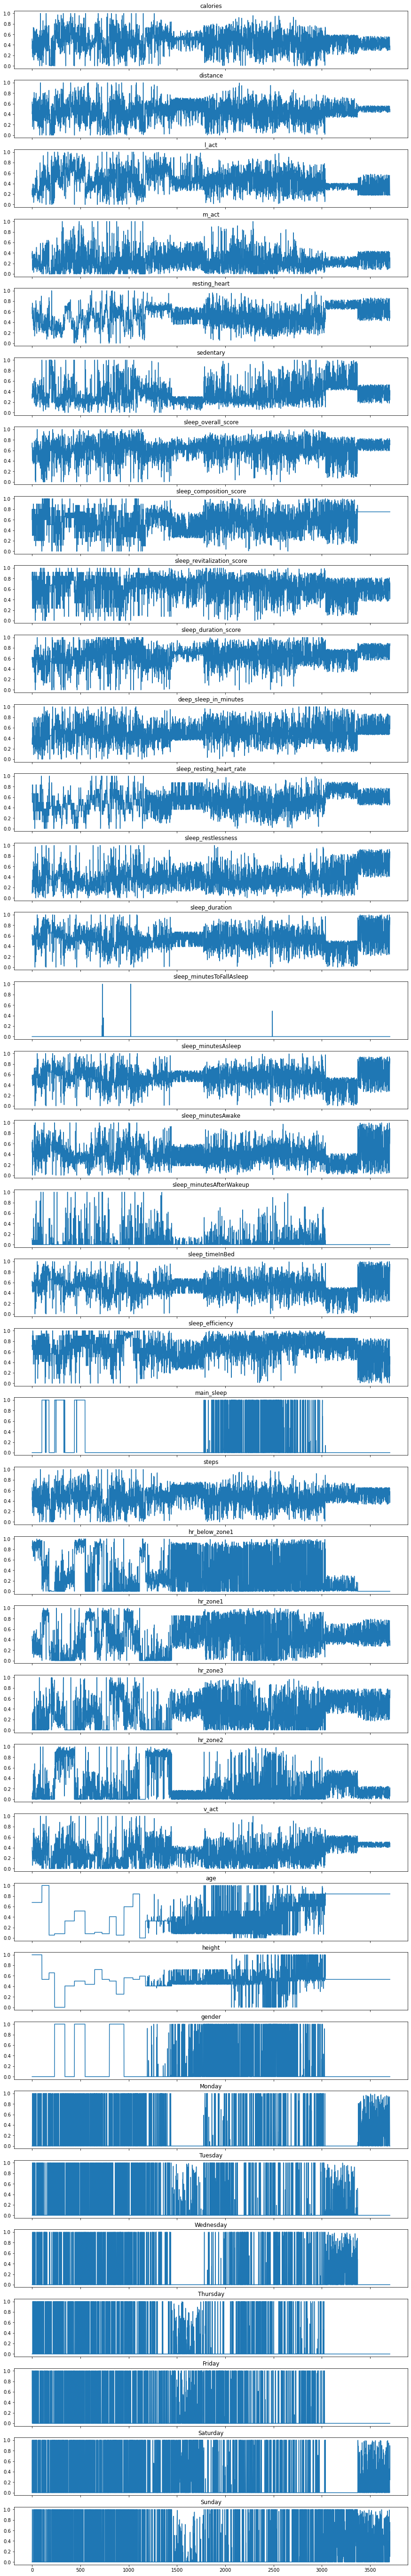

In [8]:
#plotting data

%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(agg_Xtrain.columns), sharex=True, figsize=(15,100))

for i in range(len(agg_Xtrain.columns)):

    axs[i].set_title(agg_Xtrain.columns[i])
    axs[i].plot(agg_Xtrain.iloc[:,i].reset_index(drop=True))


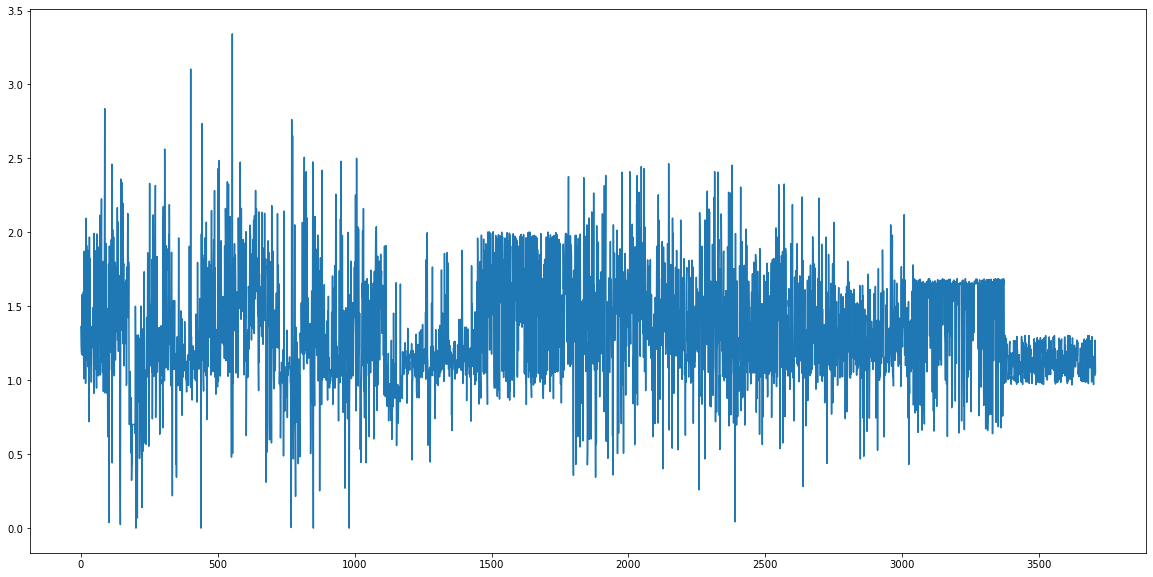

In [9]:
#checking heart rate zone time zero
fig = plt.figure(figsize=(20,10))
summed = (agg_Xtrain.loc[:,'hr_below_zone1'].reset_index(drop=True)
+agg_Xtrain.loc[:,'hr_zone1'].reset_index(drop=True)
+agg_Xtrain.loc[:,'hr_zone3'].reset_index(drop=True)
+agg_Xtrain.loc[:,'hr_zone2'].reset_index(drop=True)
)
plt.plot(summed)



6


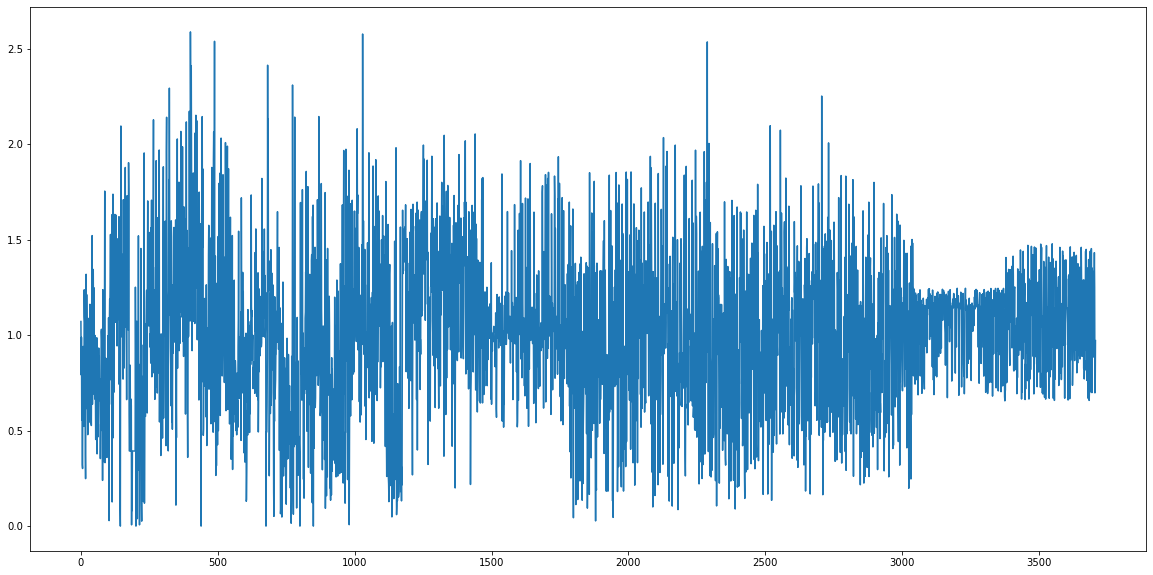

In [10]:
#checking activity sum zero

fig = plt.figure(figsize=(20,10))
act_sum = (agg_Xtrain.loc[:,'l_act'].reset_index(drop=True)
+agg_Xtrain.loc[:,'m_act'].reset_index(drop=True)
+agg_Xtrain.loc[:,'v_act'].reset_index(drop=True)
)
plt.plot(act_sum)

print(len(act_sum[act_sum==0]))
